# Project on Data Sciences and Machine Learning

## Pre processing

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [148]:
# Load dataset
df = pd.read_csv('diabetic_data.csv')
df_original=df
# View first few rows
df


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [150]:
df.shape

(101766, 50)

In [151]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [152]:
#Find duplicate instances

df.duplicated().value_counts() 

False    101766
Name: count, dtype: int64

In [153]:
# Unknown values are recorded as '?' in dataset. Replacing with null
df.replace('?', np.nan, inplace=True)

In [154]:
def feature_summary(df,val_sum):
    summary_df = pd.DataFrame({
        'Data Type': df.dtypes,
        'Non-Null Count': df.notnull().sum(),
        'Null Count': df.isnull().sum(),
        'Null Percentage' : round(df.isnull().sum() / df.shape[0] *100 , 2),
        'Unique Count': df.nunique(),
        'Min': df.min(numeric_only=True),
        'Max': df.max(numeric_only=True)
    })

    summary_df = summary_df.sort_values(by=val_sum, ascending=False)
    
    return summary_df

In [155]:

feature_summary(df,'Null Count')

,Data Type,Non-Null Count,Null Count,Null Percentage,Unique Count,Min,Max
weight,object,3197,98569,96.86,9,NaN,NaN
max_glu_serum,object,5346,96420,94.75,3,NaN,NaN
A1Cresult,object,17018,84748,83.28,3,NaN,NaN
medical_specialty,object,51817,49949,49.08,72,NaN,NaN
payer_code,object,61510,40256,39.56,17,NaN,NaN
race,object,99493,2273,2.23,5,NaN,NaN
diag_3,object,100343,1423,1.40,789,NaN,NaN
diag_2,object,101408,358,0.35,748,NaN,NaN
diag_1,object,101745,21,0.02,716,NaN,NaN
tolbutamide,object,101766,0,0.00,2,NaN,NaN


readmitted is the dependent feature  to see whether a patient was readmitted within 30 days or not

<Axes: xlabel='readmitted'>

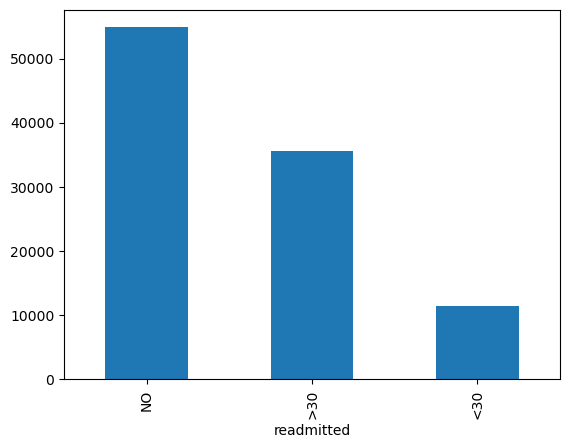

In [156]:

df['readmitted'].value_counts().plot(kind='bar')

We can make two classes
1. readmitted within 30 days = 1
2. Not readmitted within 30 days or no admission = 0

In [157]:
def label(x):
    if x=='NO' or x=='>30':
        return 0
    elif x=='<30':
        return 1
df['readmitted_before_30days'] = df['readmitted'].apply(label)

<Axes: xlabel='readmitted_before_30days'>

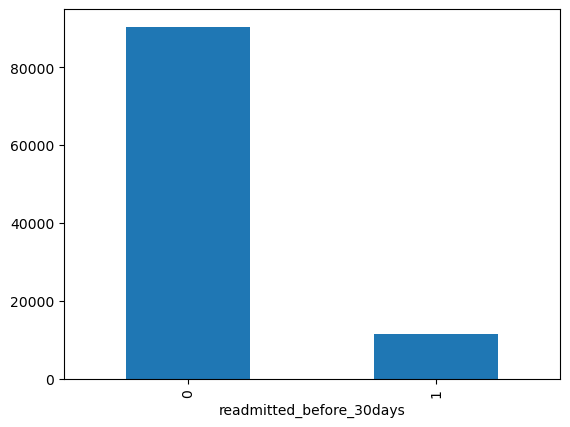

In [158]:
df['readmitted_before_30days'].value_counts().plot(kind='bar')

In [159]:
df['readmitted_before_30days'].value_counts()

readmitted_before_30days
0    90409
1    11357
Name: count, dtype: int64

In [160]:
df=df.drop(['readmitted'] ,axis=1)

The features to drop
1. 96.86% of the population's 'weight' is not available
2. 'medical_specialty' and 'payer_code' are not available for about 50%.


In [161]:
#Dropping features
df=df.drop(['weight','medical_specialty','payer_code'], axis = 1)


In [162]:
feature_summary(df,'Unique Count')

,Data Type,Non-Null Count,Null Count,Null Percentage,Unique Count,Min,Max
encounter_id,int64,101766,0,0.00,101766,12522.0,443867222.0
patient_nbr,int64,101766,0,0.00,71518,135.0,189502619.0
diag_3,object,100343,1423,1.40,789,NaN,NaN
diag_2,object,101408,358,0.35,748,NaN,NaN
diag_1,object,101745,21,0.02,716,NaN,NaN
num_lab_procedures,int64,101766,0,0.00,118,1.0,132.0
num_medications,int64,101766,0,0.00,75,1.0,81.0
number_outpatient,int64,101766,0,0.00,39,0.0,42.0
number_emergency,int64,101766,0,0.00,33,0.0,76.0
discharge_disposition_id,int64,101766,0,0.00,26,1.0,28.0


The features to drop
1. 'citoglipton' and 'examide' - all values are same
2. all values of 'encounter_id' column are unique

In [163]:
df=df.drop(['citoglipton','examide','encounter_id'],axis=1)

In [164]:
df.columns

Index(['patient_nbr', 'race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed',
       'readmitted_before_30days'],
      dtype='object')

In [165]:
df.race.value_counts(dropna=False)

race
Caucasian          76099
AfricanAmerican    19210
NaN                 2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

There are 2273 instances without race which is 2.23% which can be dropped.

In [166]:
df = df.dropna(subset=['race'])

In [167]:
df.shape

(99493, 44)

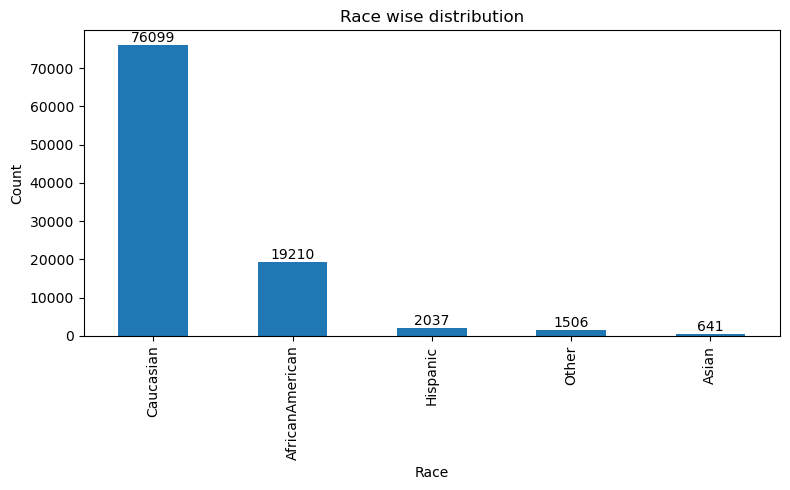

In [168]:
# Get value counts
race_counts = df['race'].value_counts()

# Create bar plot and capture Axes
ax = race_counts.plot(kind='bar', title='Race wise distribution', figsize=(8, 5))

# Add data labels on top of bars
for i, count in enumerate(race_counts.values):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.xlabel('Race')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [169]:
df['race'] = df['race'].replace(['Hispanic', 'Asian', 'Other', np.NaN],'Other')

<Axes: xlabel='race'>

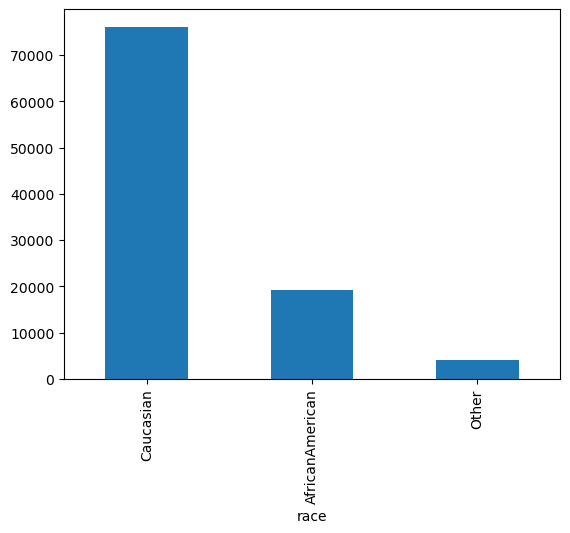

In [170]:
df['race'].value_counts().plot(kind='bar')

In [171]:
#this function returns a dataframe that contains the perccentage of each category of a particular feature that got readmitted
def category_ratio(feature):
    dic = {}
    for x in df[feature].unique():
        num = len(df[(df[feature]==x) & (df['readmitted_before_30days']==1)])
        den = len(df[df[feature]==x])
        dic[x] = (num/den)*100
    data = pd.DataFrame.from_dict(dic,orient='index',columns=['%-age belonging to class 1'])
    return data.sort_values(by=['%-age belonging to class 1'], ascending=False)

# this function return a dataframe with total observations for each category within a feature
def val_counts(df, feature):
    dic = {}
    for x in df[feature].unique():
        dic[x] = [len(df[df[feature]==x]) , (len(df[df[feature]==x])/len(df))*100]
    data = pd.DataFrame.from_dict(dic,orient='index', columns=['Total observations','%age of total data'])
    return data.sort_values(by=['Total observations'], ascending=False)


In [172]:
gender_index = df[df.gender == 'Unknown/Invalid'].index
df = df.drop(gender_index, axis=0)

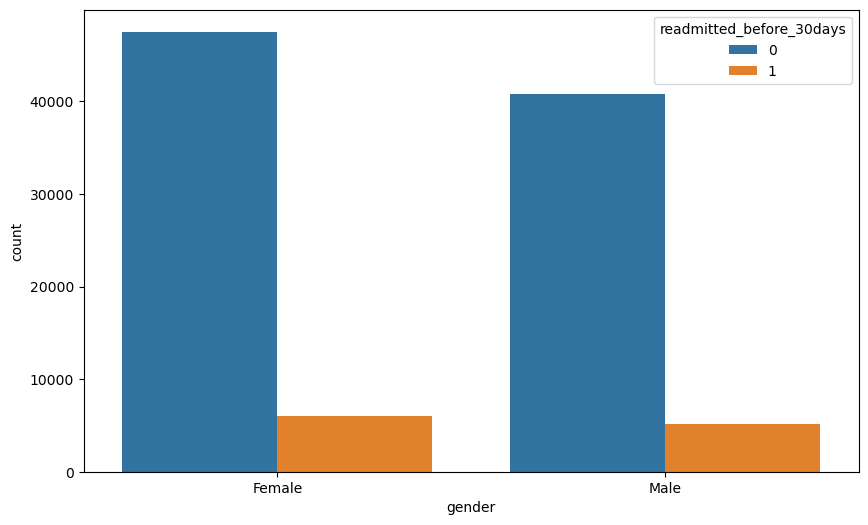

In [173]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='gender', hue='readmitted_before_30days', data=df)
plt.show()


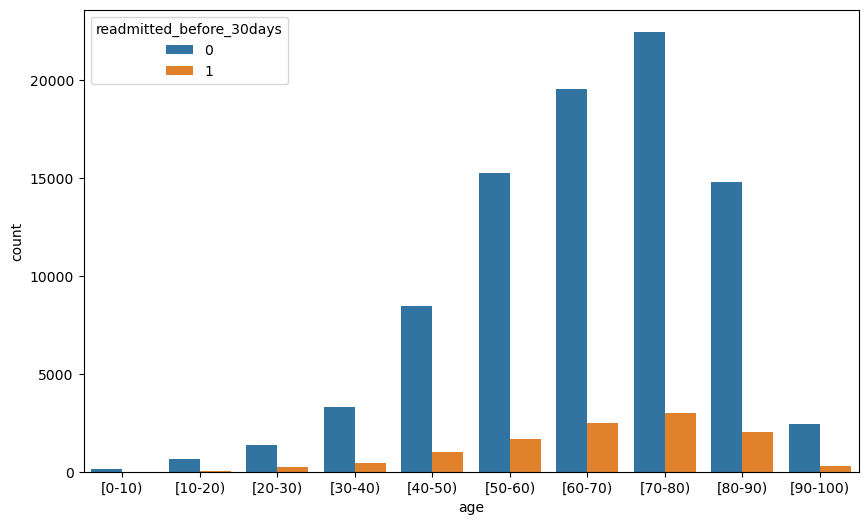

,%-age belonging to class 1
[20-30),14.400993
[80-90),12.071429
[70-80),11.850165
[30-40),11.408489
[60-70),11.228852
[90-100),11.086637
[40-50),10.660328
[50-60),9.742527
[10-20),5.865103
[0-10),1.875000


In [174]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='age', hue='readmitted_before_30days', data=df)
plt.show()
category_ratio('age')

In [175]:
feature_summary(df,'Null Count')

,Data Type,Non-Null Count,Null Count,Null Percentage,Unique Count,Min,Max
max_glu_serum,object,5290,94202,94.68,3,NaN,NaN
A1Cresult,object,16596,82896,83.32,3,NaN,NaN
diag_3,object,98143,1349,1.36,786,NaN,NaN
diag_2,object,99156,336,0.34,745,NaN,NaN
diag_1,object,99473,19,0.02,714,NaN,NaN
number_outpatient,int64,99492,0,0.00,39,0.0,42.0
nateglinide,object,99492,0,0.00,4,NaN,NaN
num_lab_procedures,int64,99492,0,0.00,118,1.0,132.0
num_medications,int64,99492,0,0.00,75,1.0,81.0
num_procedures,int64,99492,0,0.00,7,0.0,6.0


In [176]:
# total unique patients
len(df.patient_nbr), df.patient_nbr.nunique()

(99492, 69667)

In [177]:
# locate number of patient visits using patient_id
df.patient_nbr.value_counts()

patient_nbr
88785891     40
43140906     28
88227540     23
23199021     23
1660293      23
             ..
9788337       1
29974896      1
49159611      1
23304645      1
175429310     1
Name: count, Length: 69667, dtype: int64

In [178]:
df_ptnbr=df[df['patient_nbr']==88785891]
df_ptnbr[['readmitted_before_30days','A1Cresult','number_inpatient']]

,readmitted_before_30days,A1Cresult,number_inpatient
38307,0,NaN,0
40252,1,NaN,2
40661,0,NaN,3
44515,1,NaN,5
45147,1,NaN,6
45986,1,NaN,7
50167,1,NaN,9
50393,1,NaN,9
50773,1,NaN,10
51519,1,NaN,11


In [179]:
# keep only one record for each patient, the first visit
#df = df.drop_duplicates(['patient_nbr'], keep='first')

In [180]:
df.patient_nbr.nunique()

69667

In [181]:
df.shape

(99492, 44)

'patient_nbr' is unique, so we can drop this feature

In [182]:
df = df.drop('patient_nbr', axis=1)

In [183]:
df.shape

(99492, 43)

In [184]:
feature_summary(df,'Null Count')

,Data Type,Non-Null Count,Null Count,Null Percentage,Unique Count,Min,Max
max_glu_serum,object,5290,94202,94.68,3,NaN,NaN
A1Cresult,object,16596,82896,83.32,3,NaN,NaN
diag_3,object,98143,1349,1.36,786,NaN,NaN
diag_2,object,99156,336,0.34,745,NaN,NaN
diag_1,object,99473,19,0.02,714,NaN,NaN
acetohexamide,object,99492,0,0.00,2,NaN,NaN
number_outpatient,int64,99492,0,0.00,39,0.0,42.0
nateglinide,object,99492,0,0.00,4,NaN,NaN
num_lab_procedures,int64,99492,0,0.00,118,1.0,132.0
num_medications,int64,99492,0,0.00,75,1.0,81.0


In [185]:
#drop_cols=['admission_source_id','admission_type_id','glimepiride-pioglitazone','metformin-rosiglitazone','discharge_disposition_id']
df = df.drop('metformin-rosiglitazone', axis=1)

In [186]:
df.shape

(99492, 42)

In [187]:
feature_summary(df,'Null Count')

,Data Type,Non-Null Count,Null Count,Null Percentage,Unique Count,Min,Max
max_glu_serum,object,5290,94202,94.68,3,NaN,NaN
A1Cresult,object,16596,82896,83.32,3,NaN,NaN
diag_3,object,98143,1349,1.36,786,NaN,NaN
diag_2,object,99156,336,0.34,745,NaN,NaN
diag_1,object,99473,19,0.02,714,NaN,NaN
acetohexamide,object,99492,0,0.00,2,NaN,NaN
pioglitazone,object,99492,0,0.00,4,NaN,NaN
num_lab_procedures,int64,99492,0,0.00,118,1.0,132.0
num_medications,int64,99492,0,0.00,75,1.0,81.0
num_procedures,int64,99492,0,0.00,7,0.0,6.0


In [188]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer


diag_1, diag_2 and diag_3 contain ICD9 codes and there are many unique codes. We will group into diagnosis groups.
Group Names are
1-Circulatory
2-Respiratory
3-Digestive
4-Diabetes
5-Injury
6-Musculoskeletal
7-Genitourinary
8-Neoplasms
9-Other

Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Record
https://onlinelibrary.wiley.com/doi/10.1155/2014/781670

Table 2. Values of the primary diagnosis in the final dataset. In the analysis, groups that covered less than 3.5% of encounters were grouped into “other” category.


Text(0.5, 0, 'ICD-9 Diagnosis Code')

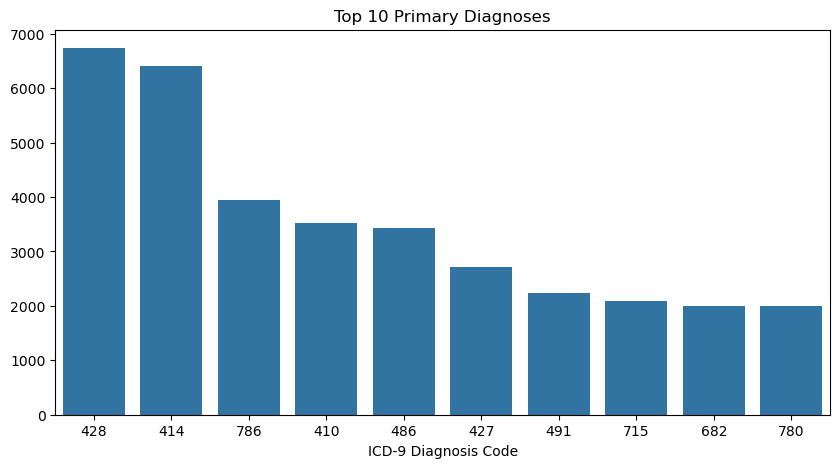

In [189]:
top_diag1 = df['diag_1'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_diag1.index.astype(str), y=top_diag1.values)
plt.title('Top 10 Primary Diagnoses')
plt.xlabel('ICD-9 Diagnosis Code')

In [190]:
df['diag_1'].nunique()

714

In [191]:
#Classification of ICD-9 Codes (International Classification of Diseases)

#function to categorize
def cat_diag(code):
    
    try:
        code_num = int(float(code))  # convert to integer
    except ValueError:
        return 'Other'
        
    if code.startswith('250'):
        return 'Diabetes'
    if 390 <= code_num <= 459 or code_num == 785:
        return 'Circulatory'
    elif 460 <= code_num <= 519 or code_num == 786:
        return 'Respiratory'
    elif 520 <= code_num <= 579 or code_num == 787:
        return 'Digestive'
    elif 580 <= code_num <= 629 or code_num == 788:
        return 'Genitourinary'
    elif 140 <= code_num <= 239:
        return 'Neoplasms'
    elif 710 <= code_num <= 739:
        return 'Musculoskeletal'
    elif 800 <= code_num <= 999:
        return 'Injury'
    else:
        return 'Other'

# Apply the function
df['diagnosis_1'] = df['diag_1'].apply(cat_diag)
df['diagnosis_2'] = df['diag_2'].apply(cat_diag)
df['diagnosis_3'] = df['diag_3'].apply(cat_diag)

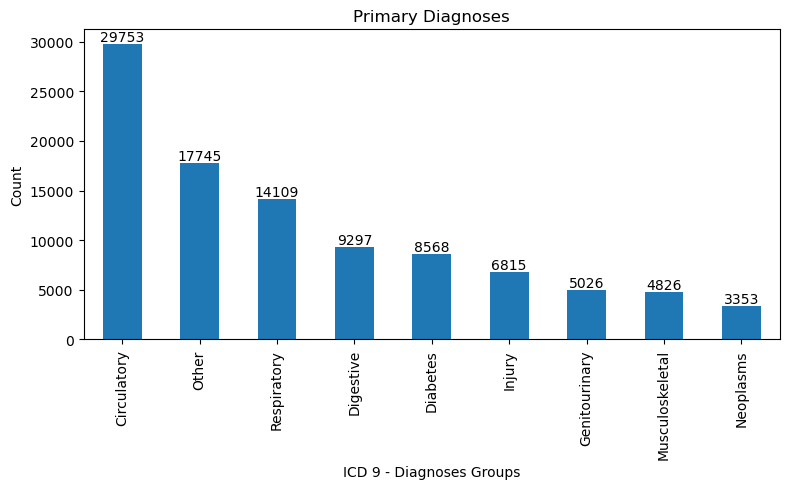

In [192]:

# Get value counts
diag_counts = df['diagnosis_1'].value_counts()

# Create bar plot and capture Axes
ax = diag_counts.plot(kind='bar', title='Primary Diagnoses', figsize=(8, 5))

# Add data labels on top of bars
for i, count in enumerate(diag_counts.values):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.xlabel('ICD 9 - Diagnoses Groups')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

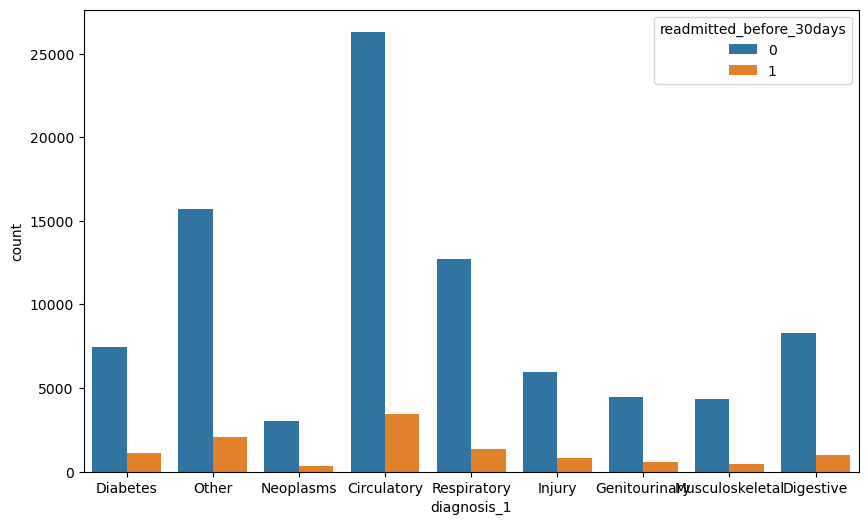

,%-age belonging to class 1
Diabetes,13.060224
Injury,12.267058
Circulatory,11.541693
Other,11.541279
Genitourinary,10.943096
Digestive,10.756158
Neoplasms,10.169997
Respiratory,9.759728
Musculoskeletal,9.614588


In [193]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='diagnosis_1', hue='readmitted_before_30days', data=df)
plt.show()
category_ratio('diagnosis_1')

In [194]:
df[['diagnosis_1', 'diagnosis_2', 'diagnosis_3']].head()

,diagnosis_1,diagnosis_2,diagnosis_3
0,Diabetes,Other,Other
1,Other,Diabetes,Other
2,Other,Diabetes,Other
3,Other,Diabetes,Circulatory
4,Neoplasms,Neoplasms,Diabetes


In [195]:
for i in df[['diagnosis_1', 'diagnosis_2', 'diagnosis_3']]:
    print(f'{i}:\n{sorted(df[i].unique())}\n')

diagnosis_1:
['Circulatory', 'Diabetes', 'Digestive', 'Genitourinary', 'Injury', 'Musculoskeletal', 'Neoplasms', 'Other', 'Respiratory']

diagnosis_2:
['Circulatory', 'Diabetes', 'Digestive', 'Genitourinary', 'Injury', 'Musculoskeletal', 'Neoplasms', 'Other', 'Respiratory']

diagnosis_3:
['Circulatory', 'Diabetes', 'Digestive', 'Genitourinary', 'Injury', 'Musculoskeletal', 'Neoplasms', 'Other', 'Respiratory']



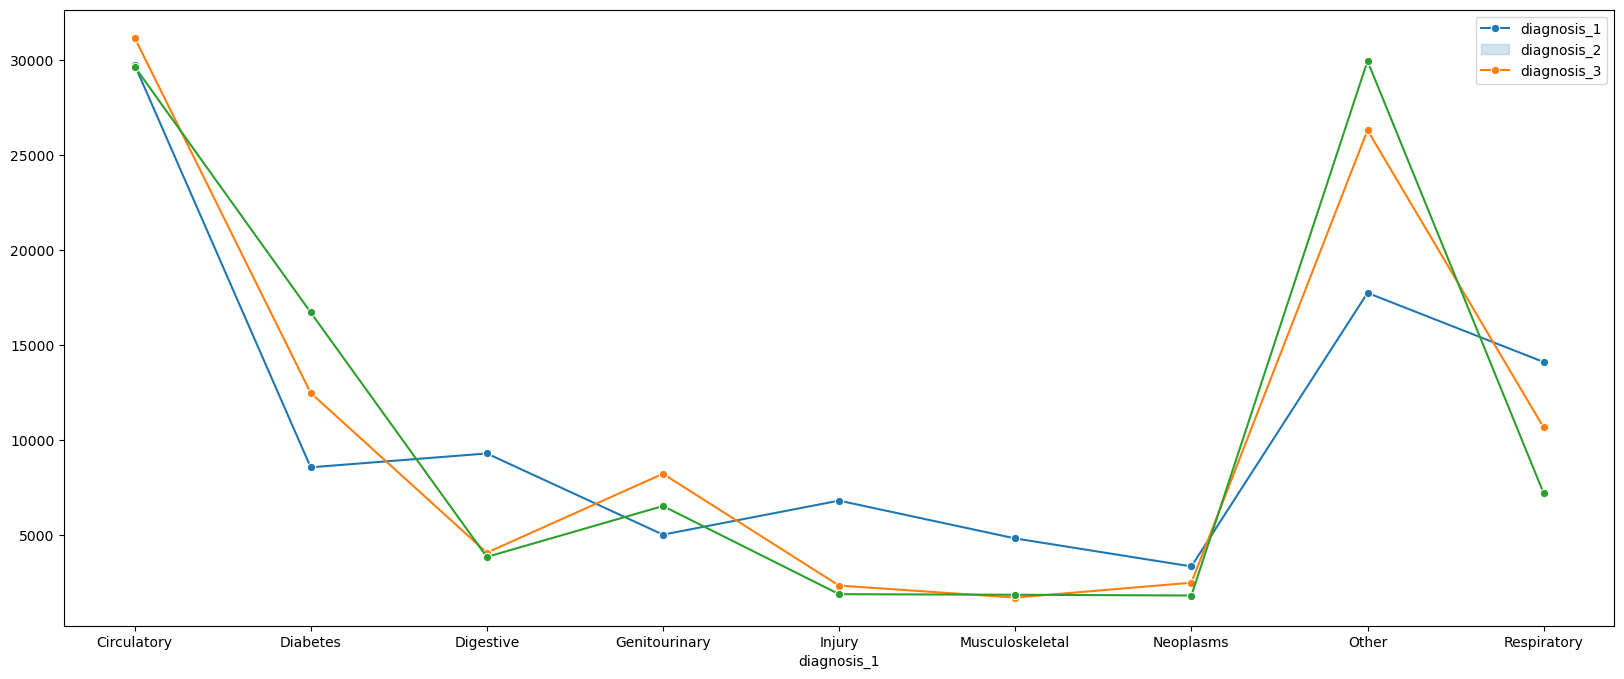

In [196]:
plt.figure(figsize=(20, 8))
for diag in ['diagnosis_1', 'diagnosis_2', 'diagnosis_3']:
    sns.lineplot(x=df[diag].value_counts().sort_index().index, y= df[diag].value_counts().sort_index().values, marker='o')
plt.legend(['diagnosis_1', 'diagnosis_2', 'diagnosis_3'])
plt.show()

In [197]:
feature_summary(df,'Null Count')

,Data Type,Non-Null Count,Null Count,Null Percentage,Unique Count,Min,Max
max_glu_serum,object,5290,94202,94.68,3,NaN,NaN
A1Cresult,object,16596,82896,83.32,3,NaN,NaN
diag_3,object,98143,1349,1.36,786,NaN,NaN
diag_2,object,99156,336,0.34,745,NaN,NaN
diag_1,object,99473,19,0.02,714,NaN,NaN
number_inpatient,int64,99492,0,0.00,21,0.0,21.0
metformin-pioglitazone,object,99492,0,0.00,2,NaN,NaN
miglitol,object,99492,0,0.00,4,NaN,NaN
nateglinide,object,99492,0,0.00,4,NaN,NaN
num_lab_procedures,int64,99492,0,0.00,118,1.0,132.0


In [198]:
df[['diag_1','diag_2', 'diag_3','number_diagnoses']][df.diag_2.isnull() & (df.diag_3.notnull()|(df.number_diagnoses > 1))]

,diag_1,diag_2,diag_3,number_diagnoses
1657,604,NaN,250.6,6
17116,227,NaN,401,6
18415,435,NaN,401,9
20289,402,NaN,425,9
24250,998,NaN,250,5
...,...,...,...,...
93873,584,NaN,NaN,7
97088,331,NaN,294,7
99621,428,NaN,428,8
100559,599,NaN,41,8


In [199]:
def feature_summ(df):
    summary_df = pd.DataFrame({
        'Data Type': df.dtypes,
        'Non-Null Count': df.notnull().sum(),
        'Null Count': df.isnull().sum(),
        'Null Percentage' : round(df.isnull().sum() / df.shape[0] *100 , 2),
        'Unique Count': df.nunique(),
        'Min': df.min(numeric_only=True),
        'Max': df.max(numeric_only=True)
    })

    summary_df = summary_df.sort_values(by='Null Count', ascending=False)
    
    return summary_df

In [200]:
feature_summ(df[['diagnosis_1','diagnosis_2', 'diagnosis_3']])

,Data Type,Non-Null Count,Null Count,Null Percentage,Unique Count,Min,Max
diagnosis_1,object,99492,0,0.0,9,NaN,NaN
diagnosis_2,object,99492,0,0.0,9,NaN,NaN
diagnosis_3,object,99492,0,0.0,9,NaN,NaN


In [201]:
drop_cols=['diag_1', 'diag_2','diag_3']
df = df.drop(drop_cols, axis=1)

In [202]:
df.shape

(99492, 42)

In [203]:
feature_summary(df,'Null Count')

,Data Type,Non-Null Count,Null Count,Null Percentage,Unique Count,Min,Max
max_glu_serum,object,5290,94202,94.68,3,NaN,NaN
A1Cresult,object,16596,82896,83.32,3,NaN,NaN
acetohexamide,object,99492,0,0.00,2,NaN,NaN
admission_source_id,int64,99492,0,0.00,17,1.0,25.0
miglitol,object,99492,0,0.00,4,NaN,NaN
nateglinide,object,99492,0,0.00,4,NaN,NaN
num_lab_procedures,int64,99492,0,0.00,118,1.0,132.0
num_medications,int64,99492,0,0.00,75,1.0,81.0
num_procedures,int64,99492,0,0.00,7,0.0,6.0
number_diagnoses,int64,99492,0,0.00,16,1.0,16.0


In [204]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(cat_cols)
#cat_cols.remove('age')

['race', 'gender', 'age', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'diagnosis_1', 'diagnosis_2', 'diagnosis_3']


In [205]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [206]:
feature_summary(df,'Null Count')


,Data Type,Non-Null Count,Null Count,Null Percentage,Unique Count,Min,Max
race,int32,99492,0,0.0,3,0,2
insulin,int32,99492,0,0.0,4,0,3
glyburide,int32,99492,0,0.0,4,0,3
tolbutamide,int32,99492,0,0.0,2,0,1
pioglitazone,int32,99492,0,0.0,4,0,3
rosiglitazone,int32,99492,0,0.0,4,0,3
acarbose,int32,99492,0,0.0,4,0,3
miglitol,int32,99492,0,0.0,4,0,3
troglitazone,int32,99492,0,0.0,2,0,1
tolazamide,int32,99492,0,0.0,3,0,2


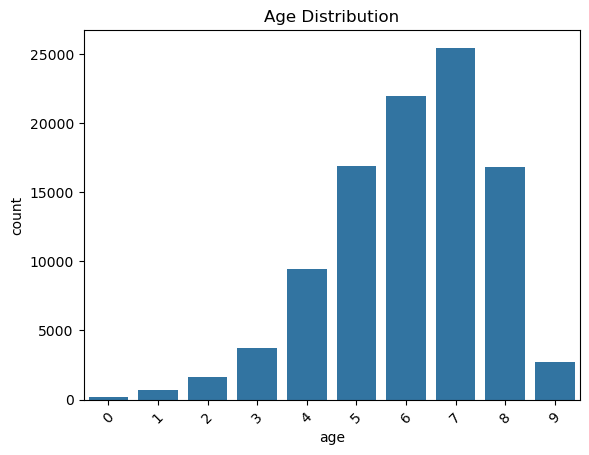

In [207]:
# Age groups are classified with numeric value
sns.countplot(x='age', data=df, order=sorted(df['age'].unique()))
plt.title('Age Distribution')
plt.xticks(rotation=45)
plt.show()


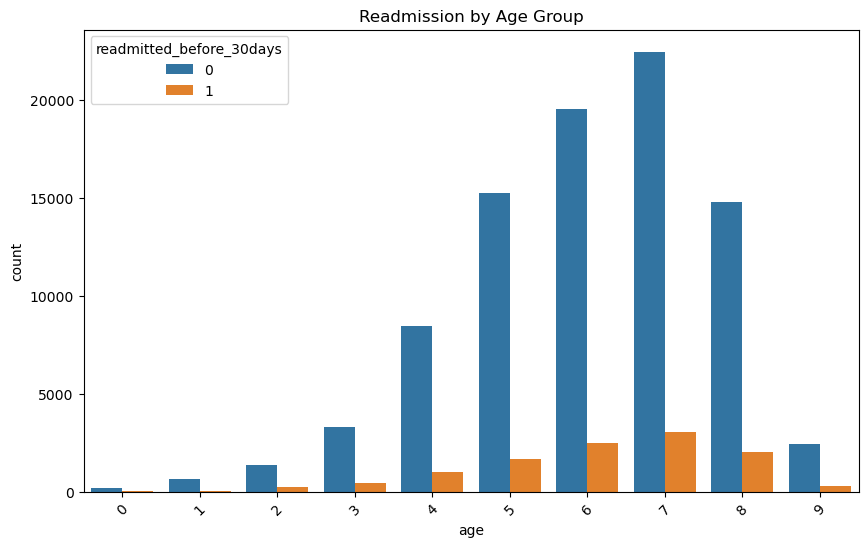

In [208]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='readmitted_before_30days', data=df)
plt.title('Readmission by Age Group')
plt.xticks(rotation=45)
plt.show()


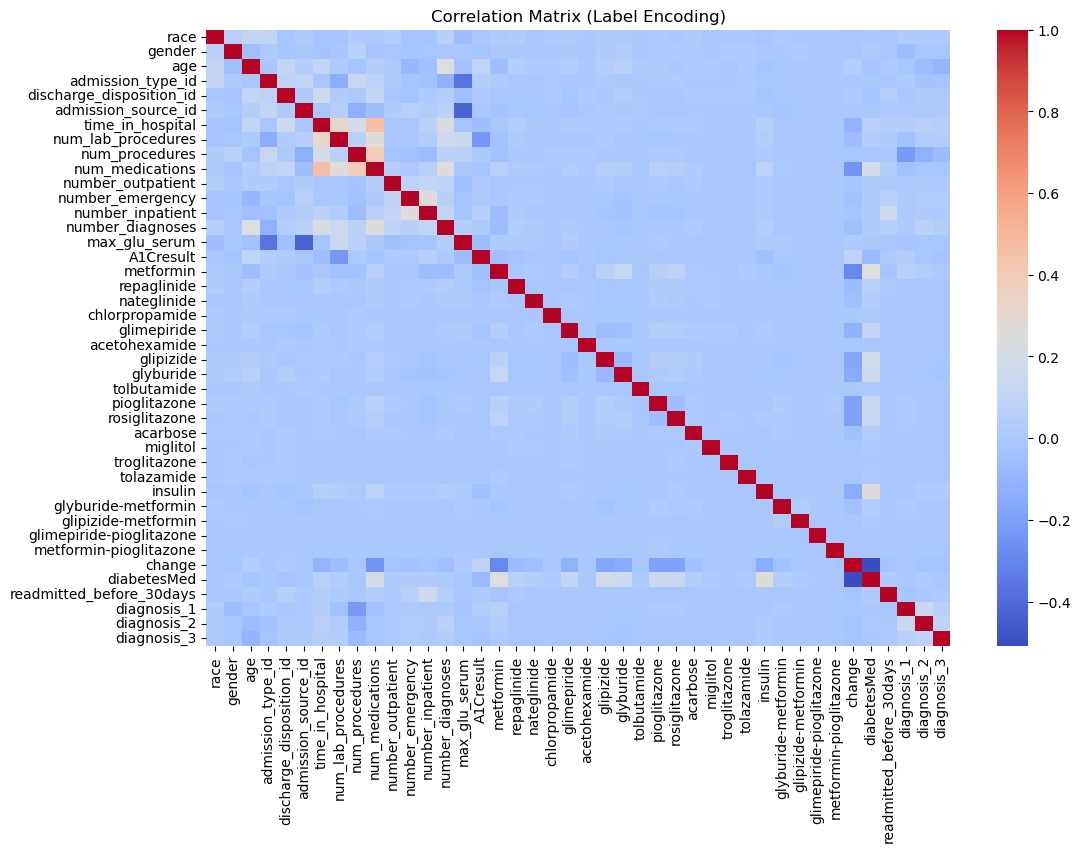

In [209]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Correlation Matrix (Label Encoding)')
plt.show()


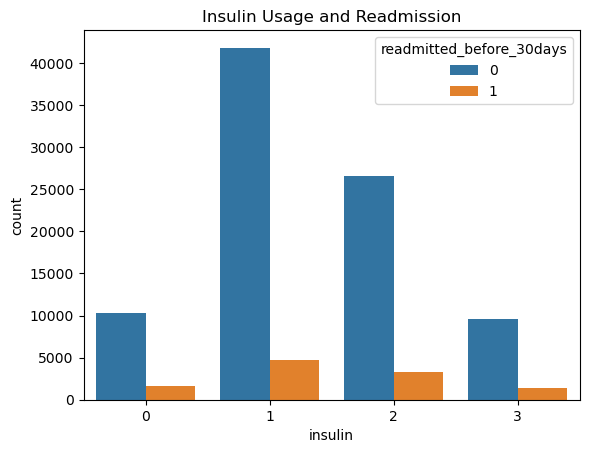

In [210]:
sns.countplot(x='insulin', hue='readmitted_before_30days', data=df)
plt.title('Insulin Usage and Readmission')
plt.show()


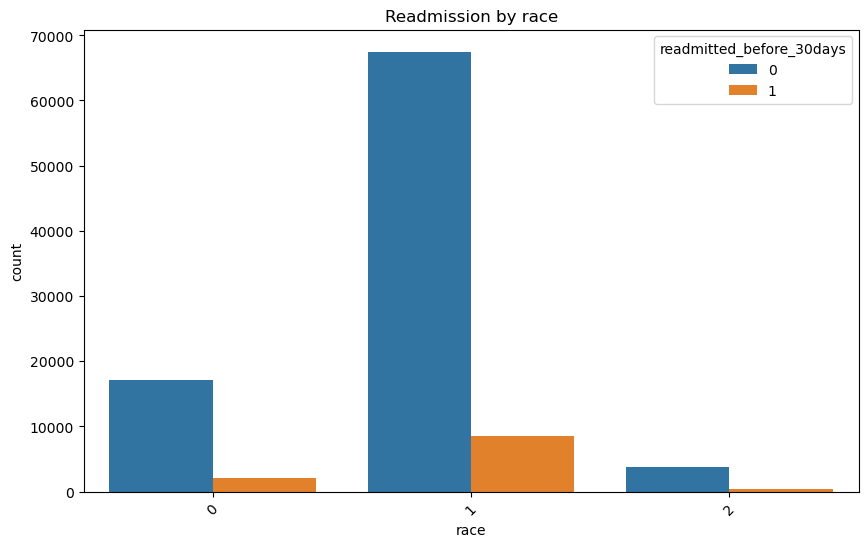

In [211]:
plt.figure(figsize=(10, 6))
sns.countplot(x='race', hue='readmitted_before_30days', data=df)
plt.title('Readmission by race')
plt.xticks(rotation=45)
plt.show()

In [212]:
def detect_outliers_iqr(df):
    outliers = {}
    yesoutliers=[]

    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Debugging information
        print(f"Column: {col}")
        print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
        print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
        
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        
        # Check for detected outliers
        if outliers[col]:
            print(f"Outliers in {col}: {outliers[col]}")
            print()
            yesoutliers.append(col)
        else:
            print(f"No outliers detected in {col}")
            print()
    print(yesoutliers)
    return outliers



In [213]:
df['readmitted_before_30days'].nunique()

2

In [214]:
outliers_iqr = detect_outliers_iqr(df)
#print("Outliers detected using IQR:", outliers_iqr)


Column: race
Q1: 1.0, Q3: 1.0, IQR: 0.0
Lower Bound: 1.0, Upper Bound: 1.0
Outliers in race: [2, 10, 11, 14, 15, 16, 18, 22, 24, 25, 30, 31, 50, 52, 53, 56, 58, 60, 62, 64, 76, 81, 84, 88, 92, 93, 94, 98, 104, 106, 110, 119, 122, 124, 125, 128, 129, 134, 135, 136, 140, 146, 157, 161, 180, 182, 185, 187, 191, 193, 197, 200, 204, 205, 206, 211, 212, 214, 215, 222, 223, 225, 227, 231, 241, 242, 246, 249, 250, 252, 254, 258, 260, 263, 271, 273, 276, 283, 302, 304, 307, 308, 309, 311, 312, 314, 316, 322, 328, 329, 330, 331, 340, 348, 352, 354, 363, 366, 368, 369, 370, 373, 380, 384, 387, 388, 389, 390, 391, 392, 399, 403, 410, 414, 415, 417, 421, 424, 425, 427, 429, 430, 431, 432, 441, 449, 454, 456, 460, 461, 463, 467, 468, 471, 472, 481, 482, 483, 489, 492, 493, 495, 496, 498, 499, 501, 507, 510, 513, 514, 523, 525, 526, 528, 529, 531, 535, 547, 548, 554, 557, 562, 568, 569, 571, 572, 574, 577, 582, 584, 585, 586, 588, 591, 602, 605, 611, 614, 615, 616, 622, 623, 624, 625, 629, 631, 632, 

In [215]:
numeric_cols = df.select_dtypes(include=['number']).columns.drop('readmitted_before_30days')

14


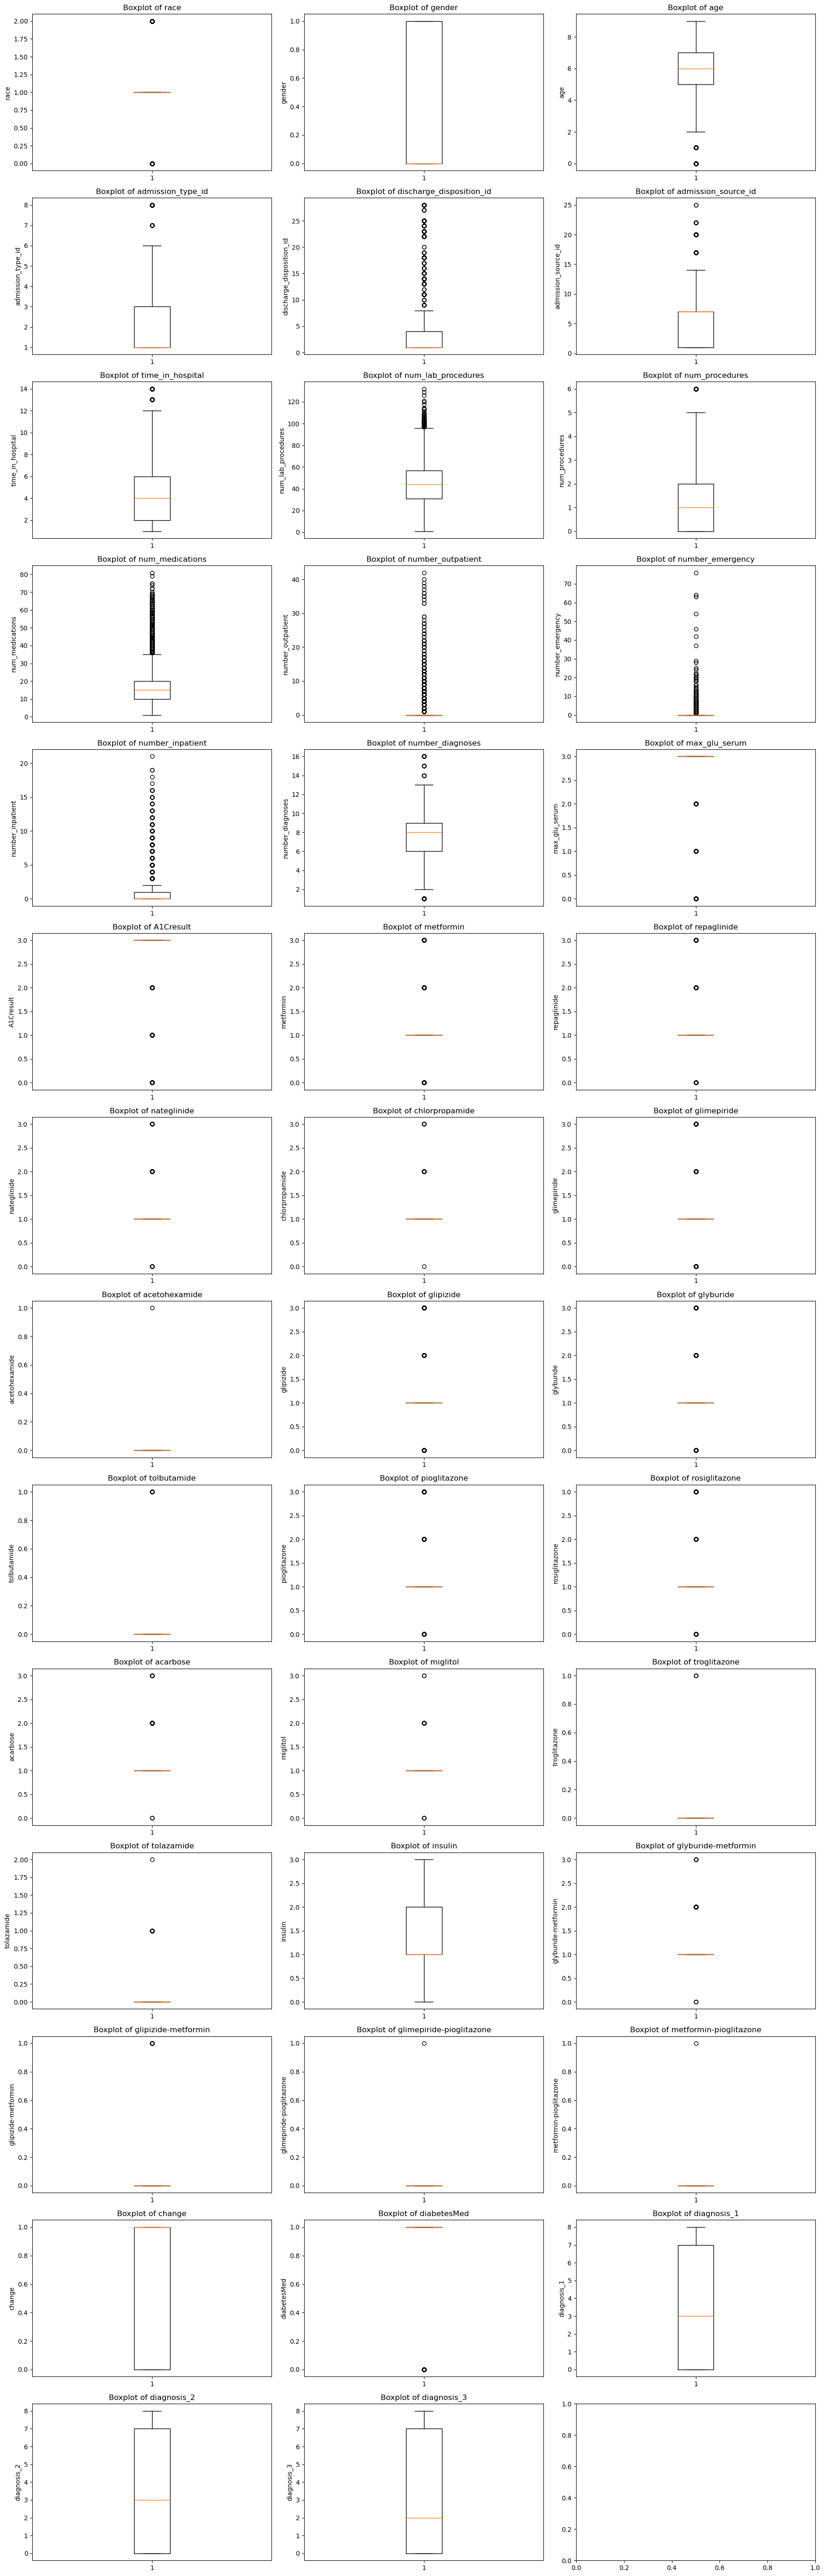

In [216]:

n_cols = 3
n_rows = int(len(numeric_cols) / n_cols)+1
print(n_rows)
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(6 * n_cols, 4 * n_rows))

axs = axs.flatten()

for i, col in enumerate(numeric_cols):
    axs[i].boxplot(df[col])
    axs[i].set_title(f'Boxplot of {col}')
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()

In [217]:
outlier_dict = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    if not outliers.empty:
        outlier_dict[col] = {
            'count': outliers.shape[0],
            'outlier_values': outliers[col].unique()
        }

In [218]:
for col, details in outlier_dict.items():
    print(f"\nFeature: {col}")
    print(f"  → Outlier count: {details['count']}")
    print(f"  → Outlier values: {sorted(details['outlier_values'])}")


Feature: race
  → Outlier count: 23393
  → Outlier values: [0, 2]

Feature: age
  → Outlier count: 842
  → Outlier values: [0, 1]

Feature: admission_type_id
  → Outlier count: 337
  → Outlier values: [7, 8]

Feature: discharge_disposition_id
  → Outlier count: 9726
  → Outlier values: [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 27, 28]

Feature: admission_source_id
  → Outlier count: 6872
  → Outlier values: [17, 20, 22, 25]

Feature: time_in_hospital
  → Outlier count: 2207
  → Outlier values: [13, 14]

Feature: num_lab_procedures
  → Outlier count: 142
  → Outlier values: [97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 113, 114, 118, 120, 121, 126, 129, 132]

Feature: num_procedures
  → Outlier count: 4825
  → Outlier values: [6]

Feature: num_medications
  → Outlier count: 2482
  → Outlier values: [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 7

In [219]:
def remove_outliers_iqr(df, cols):
    df_clean = df.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

In [220]:
df_no_outliers = remove_outliers_iqr(df, numeric_cols)

In [221]:
print("Original shape:", df_original.shape)
print("After scaling and dropping column:", df.shape)
print("After removing outliers:", df_no_outliers.shape)

Original shape: (101766, 51)
After scaling and dropping column: (99492, 42)
After removing outliers: (13425, 42)


14


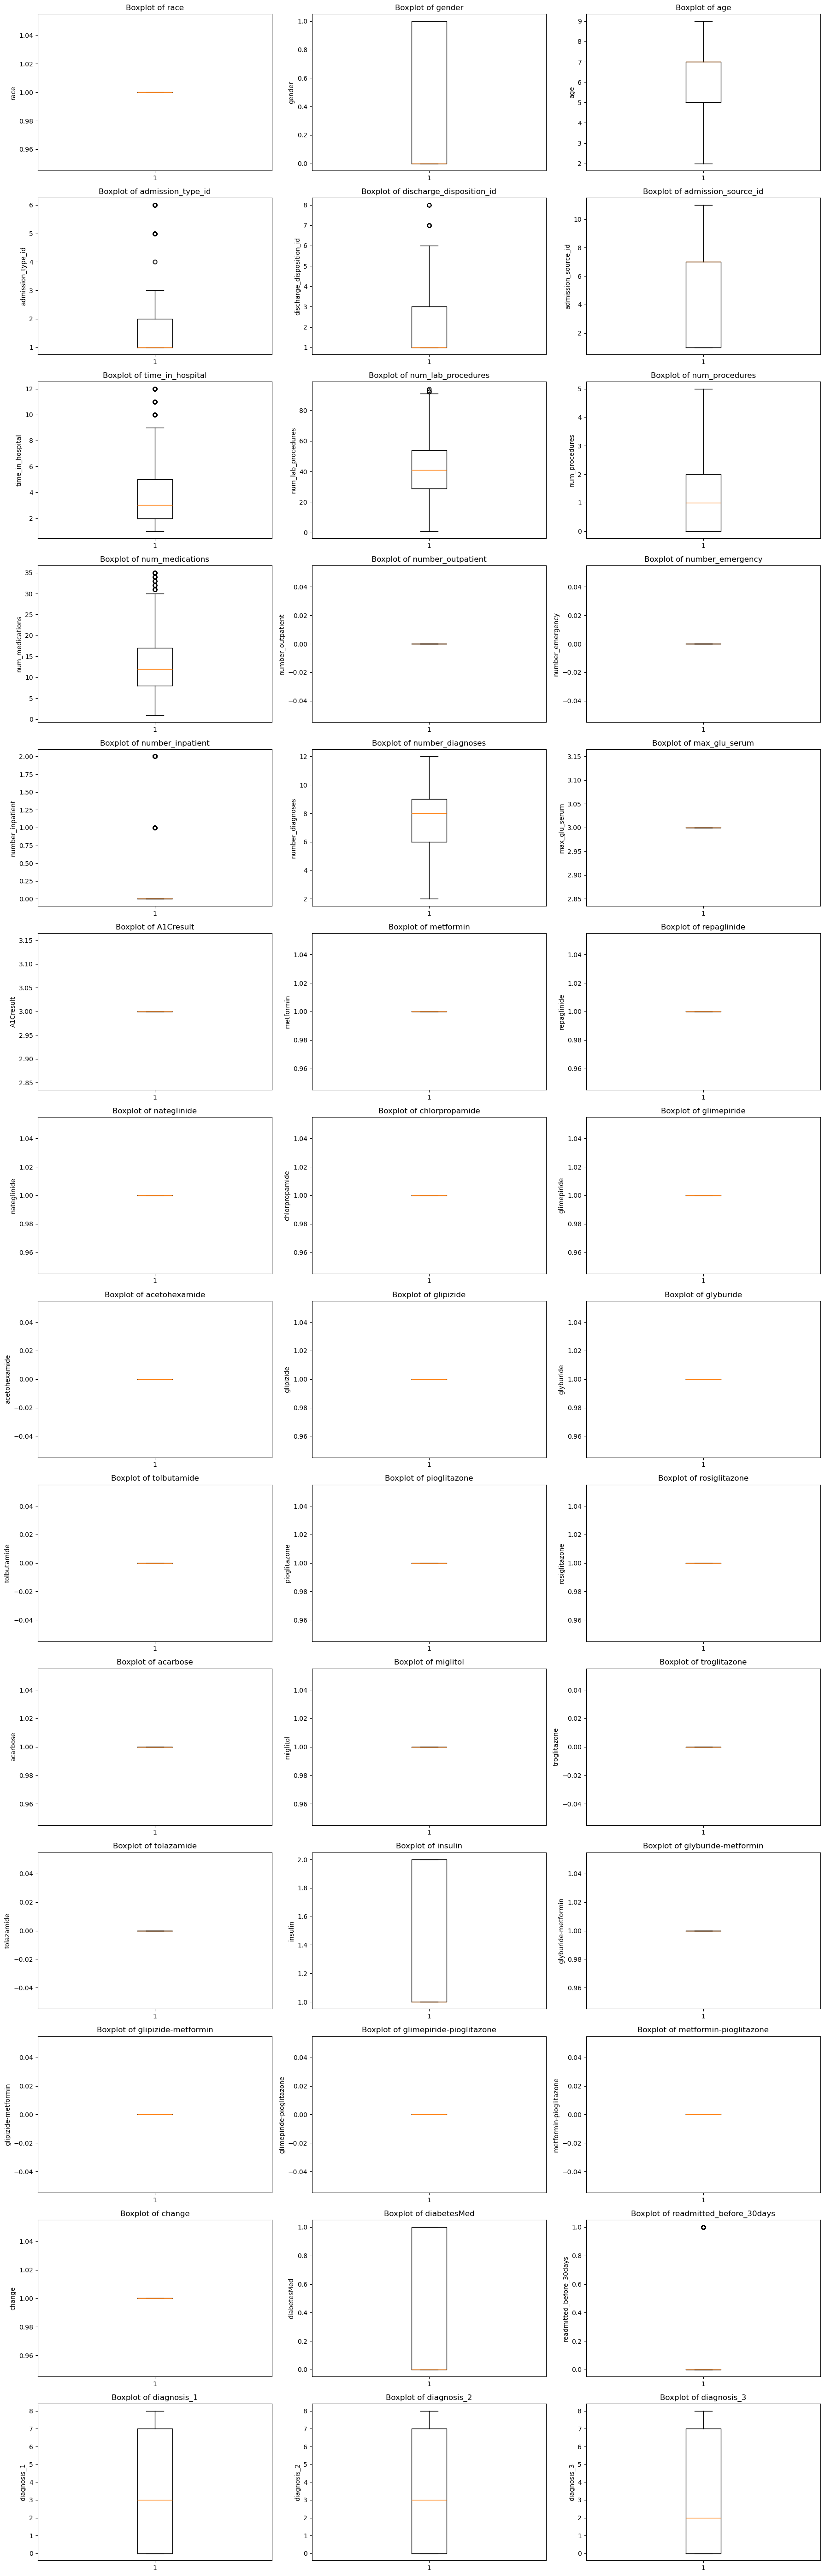

In [222]:
#numeric_cols1 = df_no_outliers.select_dtypes(include=['float64', 'int64','int32']).columns
numeric_cols1 = df_no_outliers.select_dtypes(include=['number']).columns

n_cols = 3
n_rows = int(len(numeric_cols) / n_cols)+1
print(n_rows)
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(6 * n_cols, 4 * n_rows))

axs = axs.flatten()

for i, col in enumerate(numeric_cols1):
    axs[i].boxplot(df_no_outliers[col])
    axs[i].set_title(f'Boxplot of {col}')
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()

In [223]:
X = df_no_outliers.drop(columns=['readmitted_before_30days'])  
y = df_no_outliers['readmitted_before_30days']                

print(y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

df_s = df_scaled.copy()
df_s['readmitted_before_30days'] = y


13        0
23        0
27        0
32        0
33        0
         ..
101700    0
101718    0
101744    0
101757    0
101765    0
Name: readmitted_before_30days, Length: 13425, dtype: int64


In [224]:
df_s.to_csv('diabetes_data_cleaned.csv', index=False)

#End of pre processing

#Modelling

In [225]:
df_model=pd.read_csv('diabetes_data_cleaned.csv')
df_model

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,diagnosis_1,diagnosis_2,diagnosis_3,readmitted_before_30days
0,0.0,1.084041,1.099962,-0.733535,2.323296,0.778213,2.523420,0.792509,-0.121122,2.859002,...,0.0,0.0,0.0,0.0,0.0,1.277030,-1.190026,-1.088380,-1.070433,0
1,0.0,-0.922474,1.099962,0.318346,2.323296,-1.381628,2.926107,0.103031,0.593004,0.949144,...,0.0,0.0,0.0,0.0,0.0,-0.783067,1.102379,0.477529,1.132676,0
2,0.0,-0.922474,-0.838811,-0.733535,-0.592389,-1.381628,-0.698082,-0.798593,0.593004,-0.324095,...,0.0,0.0,0.0,0.0,0.0,1.277030,0.119920,-0.148834,-0.755703,0
3,0.0,-0.922474,0.453704,-0.733535,-0.592389,0.778213,0.912669,-0.692519,-0.835248,0.471679,...,0.0,0.0,0.0,0.0,0.0,1.277030,0.119920,0.164348,-0.755703,0
4,0.0,1.084041,-0.192554,0.318346,2.323296,-1.021654,0.509981,-0.162152,-0.835248,0.789989,...,0.0,0.0,0.0,0.0,0.0,1.277030,1.429866,0.164348,1.447405,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13420,0.0,-0.922474,0.453704,-0.733535,0.573885,0.418239,-0.295394,-0.056079,-0.835248,0.471679,...,0.0,0.0,0.0,0.0,0.0,1.277030,-1.190026,-0.148834,1.132676,0
13421,0.0,-0.922474,0.453704,-0.733535,-0.592389,0.778213,-0.698082,0.421252,-0.835248,0.789989,...,0.0,0.0,0.0,0.0,0.0,1.277030,-1.190026,-1.088380,1.132676,0
13422,0.0,-0.922474,1.099962,-0.733535,-0.592389,0.778213,-1.100770,0.474288,-0.835248,-0.164940,...,0.0,0.0,0.0,0.0,0.0,-0.783067,-1.190026,-1.088380,-1.070433,0
13423,0.0,-0.922474,0.453704,-0.733535,-0.592389,0.778213,0.509981,-1.010740,-0.121122,0.471679,...,0.0,0.0,0.0,0.0,0.0,1.277030,1.429866,1.417075,1.447405,0


In [226]:
df_model['readmitted_before_30days'].nunique()

2

In [227]:
df.shape

(99492, 42)

In [228]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer


from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [229]:
X = df.drop(columns=['readmitted_before_30days'])
y = df['readmitted_before_30days']